In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [ ]:

def sen(x, tol = 1e-8, maxiter = 1000):
  sum = 0
  valores = []
  for n in range (maxiter + 1):
    valores.append(sum)
    sum += (((-1)**n) /factorial(2*n + 1))*(x**(2*n + 1))
    if abs(sum - np.sin(np.pi / 4)) < tol:
      break
  return sum, n, valores

print(f'El valor de sen(pi/4) es {(sen(np.pi / 4))[0]}, y tomo {(sen(np.pi / 4))[1] +1} iteraciones llegar a este resultado')

print(sen(np.pi / 4, )[0])

print(sen(np.pi/4, 1e-10)[0])

print(sen(np.pi/4, 1e-15)[0])

print(sen(np.pi/4, 1e-20)[0])

print(sen(np.pi/4, 1e-30)[0])

# para obtener el error relativo lo compararemos con la funcion seno de numpy

error_porcentual = abs(((sen(np.pi / 4)[0] - np.sin(np.pi / 4))) / np.sin(np.pi / 4)) * 100
print(f'El error porcentual es {error_porcentual}')

error_relativo = abs((sen(np.pi / 4)[0] - np.sin(np.pi / 4)))
print(f'El error relativo es {error_relativo}')



El valor de sen(pi/4) es 0.7071067829368671, y tomo 5 iteraciones llegar a este resultado
0.7071067829368671
0.7071067811796194
0.7071067811865475
0.7071067811865475
0.7071067811865475
El error porcentual es 2.475325811534497e-07
El error relativo es 1.7503196669821364e-09


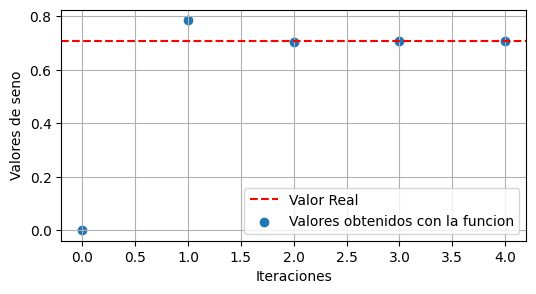

In [ ]:
indices =[i for i in range(sen(np.pi / 4)[1] + 1)]
plt.figure(figsize=(6, 3))
plt.axhline(np.sin(np.pi / 4), color='r', linestyle='--', label='Valor Real')
plt.grid()
plt.xlabel('Iteraciones')
plt.ylabel('Valores de seno')
plt.scatter(indices, sen(np.pi / 4)[2], label= 'Valores obtenidos con la funcion')
plt.legend()
plt.show()

In [ ]:
#Repitiendo con Ln
def ln(x, tol = 1e-6, maxiter = 1000):
  sum = 0
  valores = []
  for n in range (1, maxiter + 1):
    valores.append(sum)
    sum += ((-1)**(n-1) / n)*(x**n)
    if abs(sum - np.log(1 + x)) < tol:
      break
  return sum, n, valores

tolerancias = [1e-6, 1e-10, 1e-15, 1e-20, 1e-30]

results = []
itermade = []
for i in tolerancias:
  iter = ln(np.pi / 4, tol = i)
  results.append(iter[0])
  itermade.append(iter[1])




print(f'El valor de ln(1+x) es {(ln(np.pi /4))[0]}, y tomo {(ln(np.pi/4))[1] +1} iteraciones llegar a este resultado')
print(f'el valor de ln(x+1) para estas tolerancias: {tolerancias} y son respectivamente {results} en esta cantidad de iteraciones respectivamente {itermade}')

El valor de ln(1+x) es 0.579642351689797, y tomo 40 iteraciones llegar a este resultado
el valor de ln(x+1) para estas tolerancias: [1e-06, 1e-10, 1e-15, 1e-20, 1e-30] y son respectivamente [0.579642351689797, 0.5796414511629658, 0.5796414510841199, 0.5796414510841191, 0.5796414510841191] en esta cantidad de iteraciones respectivamente [39, 75, 119, 123, 123]


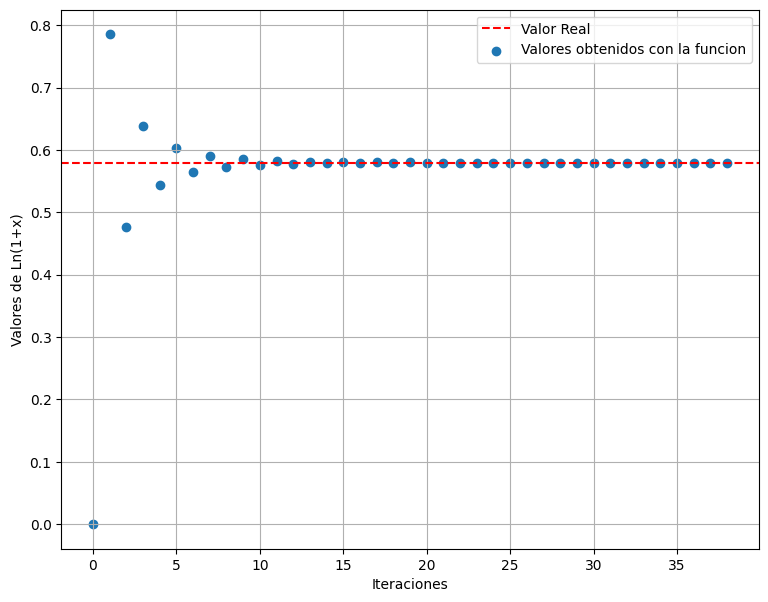

In [ ]:
valores_ln = ln(np.pi / 4)[2]
indices = range(len(valores_ln))
plt.figure(figsize=(9, 7))
plt.axhline(np.log(1 + np.pi / 4), color='r', linestyle='--', label='Valor Real')
plt.grid()
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Ln(1+x)')
plt.scatter(indices, ln(np.pi / 4)[2], label= 'Valores obtenidos con la funcion')
plt.legend()
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



El error relativo es 4.275129948360752e-07
El error porcentual es 4.275129948360752e-05


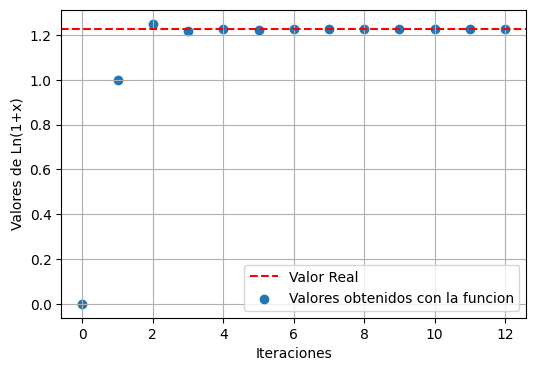

In [ ]:
def binom(alpha, n):
  if n == 0:
    return 1
  coef = 1
  for k in range(1, n+1):
    coef *= (alpha - k + 1) / k
  return coef


def taylor_series(x, alpha, tol=1e-6, maxiter=1000):
  sum = 0
  valores = []
  for n in range(maxiter + 1):
    valores.append(sum)
    sum += binom(x, n) * x**n
    if abs(sum - np.sqrt(1 + x)) < tol:
      break
  return sum, n, valores


#taylor_series(0.5, 1/2)[1]

error_relativo = abs((taylor_series(0.5, 1/2)[0] - np.sqrt(1 + 0.5)) / np.sqrt(1 + 0.5))
print(f'El error relativo es {error_relativo}')

error_porcentual = abs(((taylor_series(0.5, 1/2)[0] - np.sqrt(1 + 0.5)) / np.sqrt(1 + 0.5)) * 100)
print(f'El error porcentual es {error_porcentual}')


valores_ts = taylor_series(0.5, 0.5)[2]
indices = range(len(valores_ts))
plt.figure(figsize=(6, 4))
plt.axhline(np.sqrt(1.5), color='r', linestyle='--', label='Valor Real')
plt.grid()
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Ln(1+x)')
plt.scatter(indices, taylor_series(0.5, 0.5)[2], label= 'Valores obtenidos con la funcion')
plt.legend()
plt.show()

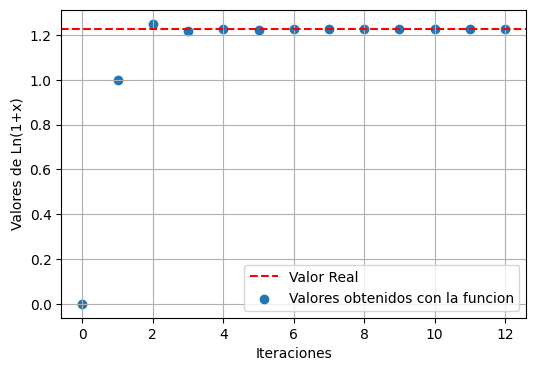

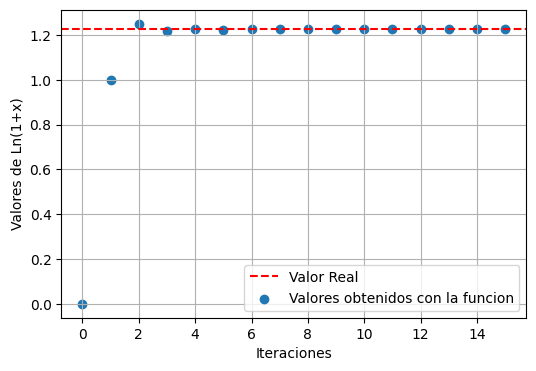

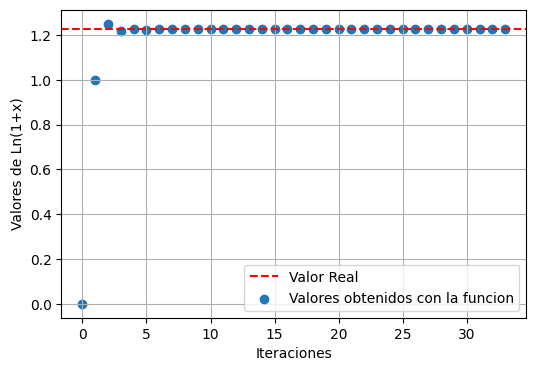

In [ ]:
taylor_values = []
taylor_iterations = []
set_iter = []
for i in range(8):
  t = 10**(-(6+i))
  T = taylor_series(0.5, 0.5, tol = t)
  taylor_values.append(T[0])
  taylor_iterations.append(T[1])
  set_iter.append(T[2])


valores_ts = set_iter[0]
indices = range(len(valores_ts))
plt.figure(figsize=(6, 4))
plt.axhline(np.sqrt(1.5), color='r', linestyle='--', label='Valor Real')
plt.grid()
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Ln(1+x)')
plt.scatter(indices, set_iter[0], label= 'Valores obtenidos con la funcion')
plt.legend()
plt.show()

valores_ts = set_iter[1]
indices = range(len(valores_ts))
plt.figure(figsize=(6, 4))
plt.axhline(np.sqrt(1.5), color='r', linestyle='--', label='Valor Real')
plt.grid()
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Ln(1+x)')
plt.scatter(indices, set_iter[1], label= 'Valores obtenidos con la funcion')
plt.legend()
plt.show()


valores_ts = set_iter[7]
indices = range(len(valores_ts))
plt.figure(figsize=(6, 4))
plt.axhline(np.sqrt(1.5), color='r', linestyle='--', label='Valor Real')
plt.grid()
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Ln(1+x)')
plt.scatter(indices, set_iter[7], label= 'Valores obtenidos con la funcion')
plt.legend()
plt.show()




#plt.scatter((taylor_iterations), (taylor_values), label = 'Taylor Series')



#for i, j in taylor_iterations, set_iter:
 # plt.figure(figsize=(6, 4))
  #plt.axhline(np.sqrt(1.5), color='r', linestyle='--', label='Valor Real')
  #plt.grid()
  #plt.xlabel('Iteraciones')
  #plt.ylabel('Valores de Ln(1+x)')
  #plt.scatter(i, j, label= 'Valores obtenidos con la funcion')
  #plt.legend()
  #plt.show()



